# Inspecting LayerNorm

4/25/2024

LayerNorm can be seen as enforcing a notion of equivalence between transformer hidden states.

Particularly,
- If we translate a state by the vector $[1, \ldots, 1]$ and apply LayerNorm, we should get the same output.
- If we scale a state by a positive scalar and apply LayerNorm, we should get the same output.

So we know there's some kind of equivalence; but what does this look like? Let's try visualizing this in 2D.

We could imagine it though as centering the vector in some way, and then projecting to the unit sphere.


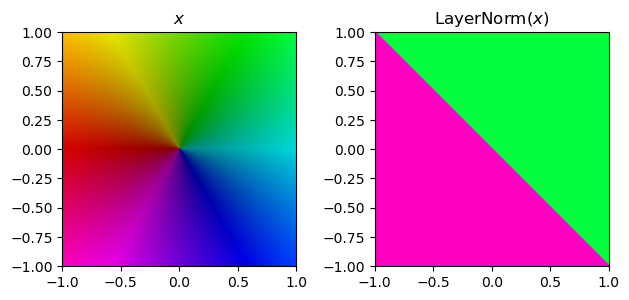

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

def layernorm(x):
	return (x - x.mean(axis=-1, keepdims=True))/(x.std(axis=-1, keepdims=True) + 1e-8)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def to_hsv(x):
    mag = np.linalg.norm(x, axis=-1)
    angle = np.arctan2(x[..., 1], x[..., 0])
    return np.stack([
        angle / (2 * np.pi) + 0.5,
        np.ones_like(x[..., 0]),
        mag / (2 * mag.max()) + 0.5,
    ], axis=-1)

# We'll first do this with 2D vectors.
scale = 1000
x = np.zeros((scale, scale, 2))
x[:, :, 0] = np.linspace(-1, 1, scale)
x[:, :, 1] = np.linspace(-1, 1, scale).reshape(-1, 1).repeat(scale, axis=1)

x_ln = layernorm(x).reshape(-1, 2)

plt.subplot(1, 2, 1)

img2 = matplotlib.colors.hsv_to_rgb(to_hsv(x)).reshape(scale, scale, 3)

plt.title("$x$")
plt.imshow(img2, extent=(-1, 1, -1, 1), cmap='hsv')

plt.subplot(1, 2, 2)

img1 = matplotlib.colors.hsv_to_rgb(to_hsv(x_ln)).reshape(scale, scale, 3)

plt.title("$\\operatorname{LayerNorm}(x)$")
plt.imshow(img1, extent=(-1, 1, -1, 1), cmap='hsv')

plt.tight_layout()
plt.show()

